# Visualization of Fragment Libraries

In [1]:
import pandas as pd
import seaborn as sns

import mols2grid

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem.MolStandardize import rdMolStandardize

import ipywidgets as widgets

In [2]:
import sys

sys.path.append("../experiments")

from utils import show_molecule_idx

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## DSI Poised Library

In [3]:
df = pd.read_csv("data/DSIpoised.csv")

In [4]:
df.head()

MW  CLogP  HBD   TPSA  RotBonds                      SMILES
0  210.273 -0.209    0  46.34         3  Cc1noc(C)c1CC(C)C(=O)N(C)C
1  238.713  2.918    1  32.34         3  O=C(CN1CCCC1)Nc1cccc(Cl)c1
2  220.289  1.012    0  49.85         1  COC1CN(S(=O)(=O)N2CCCC2)C1
3  236.214  1.957    2  47.28         3  NC(=S)Nc1ccc(OC(F)(F)F)cc1
4  220.289 -0.158    1  66.48         2   CS(=O)(=O)NCC(=O)N1CCCCC1

In [5]:
PandasTools.AddMoleculeColumnToFrame(df, "SMILES", "mol")

MW  CLogP  HBD   TPSA  RotBonds                      SMILES  \
0  210.273 -0.209    0  46.34         3  Cc1noc(C)c1CC(C)C(=O)N(C)C   

                                                 mol  
0  <img data-content="rdkit/molecule" src="data:i...
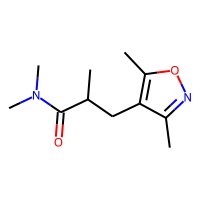

In [6]:
df.head(1)

In [7]:
df["mol"] = df["mol"].apply(rdMolStandardize.Normalize)
df["mol"] = df["mol"].apply(rdMolStandardize.Cleanup)
df["mol"] = df["mol"].apply(rdMolStandardize.FragmentParent)

In [8]:
mols2grid.display(df, mol_col="mol", subset=["img", "MW"], n_cols=6, n_rows=6)

In [9]:
df["molh"] = df["mol"].apply(Chem.AddHs)
df["molh"].apply(AllChem.EmbedMolecule)

mols = list(df["molh"])

In [10]:
_ = widgets.interact(lambda idx: show_molecule_idx(idx, mols), idx=(0, len(mols) - 1))

interactive(children=(IntSlider(value=429, description='idx', max=859), Output()), _dom_classes=('widget-inter…

## Virtual Exploratory Heterocyclic Library

In [11]:
df = pd.read_csv("data/VEHICLe.csv")

In [12]:
df.head()

regid                 smiles  Training dataset hits  \
0      S1             c1cc[nH]c1                  81848   
1     S10             c1c[nH]nn1                   7925   
2    S100           O=C1C=CSC=C1                      7   
3   S1000    O=C1OC(=O)c2sccc2S1                      0   
4  S10000  O=C1N=NN2C=CC=NN2C1=O                      0   

   Beilstein hits June 08  Pgood  Tautomer cluster  
0                     NaN   0.99               NaN  
1                     NaN   0.98               2.0  
2                   375.0   0.92               NaN  
3                     0.0   0.86               NaN  
4                     0.0   0.00               NaN

In [13]:
PandasTools.AddMoleculeColumnToFrame(df, "smiles", "mol")

regid      smiles  Training dataset hits  Beilstein hits June 08  Pgood  \
0    S1  c1cc[nH]c1                  81848                     NaN   0.99   

   Tautomer cluster                                                mol  
0               NaN  <img data-content="rdkit/molecule" src="data:i...
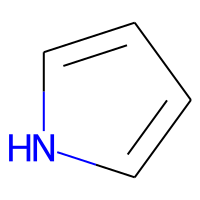

In [14]:
df.head(1)

In [15]:
mols2grid.display(
    df,
    mol_col="mol",
    subset=["img", "Pgood"],
    n_cols=6,
    n_rows=6,
    prerender=False,
)

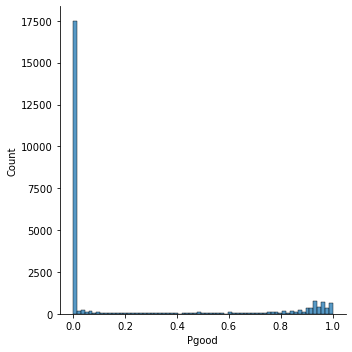

In [16]:
sns.displot(df, x="Pgood")

In [17]:
mols2grid.display(
    df[df.Pgood > 0.9],
    mol_col="mol",
    subset=["img", "Pgood"],
    n_cols=6,
    n_rows=6,
    prerender=False,
)

### Filter

Many enumerated rings are predicted to be synthetically intractable and all known rings are predicted to be tractable. Therefore, we only focus on the synthetically tractable systems.

In [18]:
df_good = df[df.Pgood > 0.5][["regid", "smiles", "Pgood"]]
df_good.head()

regid               smiles  Pgood
0      S1           c1cc[nH]c1   0.99
1     S10           c1c[nH]nn1   0.98
2    S100         O=C1C=CSC=C1   0.92
3   S1000  O=C1OC(=O)c2sccc2S1   0.86
14  S1001  O=C1OC(=O)c2ccsc2S1   0.85

In [19]:
df_good.describe()

Pgood
count  5421.000000
mean      0.884529
std       0.120522
min       0.510000
25%       0.850000
50%       0.930000
75%       0.960000
max       1.000000

In [20]:
df_good.to_csv("data/VEHICLe_good.csv", index=False)